In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("dataset_sdn (3).csv")

# Specify the time-related columns to extract
# time_related_columns = ["dt", "dur", "dur_nsec", "tot_dur", "pktrate", "tx_kbps", "rx_kbps", "tot_kbps"]
# extracted_time_features = df[time_related_columns]

# # Display or save the extracted time-related features
# extracted_time_features

# extracted_time_features.to_csv("time_related_features.csv", index=False)

In [3]:
# Ensure that there are no zero values in 'pktcount' to avoid division by zero
df['pktcount'].replace(0, np.nan, inplace=True)  # Replace 0 with NaN to handle division errors

# Calculate packet size and create the new column
df['packet_size'] = df['bytecount'] / df['pktcount']

# Fill any NaN values with 0 or another appropriate value, if needed
df['packet_size'].fillna(0, inplace=True)

df

C:\Users\Kanav Chauhan\AppData\Local\Temp\ipykernel_7444\3709153241.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pktcount'].replace(0, np.nan, inplace=True)  # Replace 0 with NaN to handle division errors
C:\Users\Kanav Chauhan\AppData\Local\Temp\ipykernel_7444\3709153241.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,packet_size
0,11425,1,10.0.0.1,10.0.0.8,45304.0,48294064,100,716000000,1.010000e+11,3,...,0,UDP,3,143928631,3917,0,0.0,0.0,0,1066.0
1,11605,1,10.0.0.1,10.0.0.8,126395.0,134737070,280,734000000,2.810000e+11,2,...,0,UDP,4,3842,3520,0,0.0,0.0,0,1066.0
2,11425,1,10.0.0.2,10.0.0.8,90333.0,96294978,200,744000000,2.010000e+11,3,...,0,UDP,1,3795,1242,0,0.0,0.0,0,1066.0
3,11425,1,10.0.0.2,10.0.0.8,90333.0,96294978,200,744000000,2.010000e+11,3,...,0,UDP,2,3688,1492,0,0.0,0.0,0,1066.0
4,11425,1,10.0.0.2,10.0.0.8,90333.0,96294978,200,744000000,2.010000e+11,3,...,0,UDP,3,3413,3665,0,0.0,0.0,0,1066.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79.0,7742,81,842000000,8.184200e+10,5,...,0,ICMP,1,15209,12720,1,1.0,2.0,0,98.0
104341,5262,3,10.0.0.5,10.0.0.7,79.0,7742,81,842000000,8.184200e+10,5,...,0,ICMP,3,15099,14693,1,1.0,2.0,0,98.0
104342,5262,3,10.0.0.11,10.0.0.5,31.0,3038,31,805000000,3.180500e+10,5,...,0,ICMP,2,3409,3731,0,0.0,0.0,0,98.0
104343,5262,3,10.0.0.11,10.0.0.5,31.0,3038,31,805000000,3.180500e+10,5,...,0,ICMP,1,15209,12720,1,1.0,2.0,0,98.0


In [4]:
# Ensure that there are no cases where pktcount <= 1 to avoid division by zero
df['pktcount'] = df['pktcount'].replace(1, np.nan)  # Set pktcount=1 to NaN to prevent division by zero
df['pktcount'] = df['pktcount'].replace(0, np.nan)  # Set pktcount=0 to NaN to prevent invalid values

# Calculate packet inter-arrival time and create the new column
df['packet_inter_arrival_time'] = df['tot_dur'] / (df['pktcount'] - 1)

# Fill any NaN values with 0 or another appropriate value, if needed
df['packet_inter_arrival_time'].fillna(0, inplace=True)

df

C:\Users\Kanav Chauhan\AppData\Local\Temp\ipykernel_7444\3871509704.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['packet_inter_arrival_time'].fillna(0, inplace=True)


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,packet_size,packet_inter_arrival_time
0,11425,1,10.0.0.1,10.0.0.8,45304.0,48294064,100,716000000,1.010000e+11,3,...,UDP,3,143928631,3917,0,0.0,0.0,0,1066.0,2.229433e+06
1,11605,1,10.0.0.1,10.0.0.8,126395.0,134737070,280,734000000,2.810000e+11,2,...,UDP,4,3842,3520,0,0.0,0.0,0,1066.0,2.223207e+06
2,11425,1,10.0.0.2,10.0.0.8,90333.0,96294978,200,744000000,2.010000e+11,3,...,UDP,1,3795,1242,0,0.0,0.0,0,1066.0,2.225125e+06
3,11425,1,10.0.0.2,10.0.0.8,90333.0,96294978,200,744000000,2.010000e+11,3,...,UDP,2,3688,1492,0,0.0,0.0,0,1066.0,2.225125e+06
4,11425,1,10.0.0.2,10.0.0.8,90333.0,96294978,200,744000000,2.010000e+11,3,...,UDP,3,3413,3665,0,0.0,0.0,0,1066.0,2.225125e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79.0,7742,81,842000000,8.184200e+10,5,...,ICMP,1,15209,12720,1,1.0,2.0,0,98.0,1.049256e+09
104341,5262,3,10.0.0.5,10.0.0.7,79.0,7742,81,842000000,8.184200e+10,5,...,ICMP,3,15099,14693,1,1.0,2.0,0,98.0,1.049256e+09
104342,5262,3,10.0.0.11,10.0.0.5,31.0,3038,31,805000000,3.180500e+10,5,...,ICMP,2,3409,3731,0,0.0,0.0,0,98.0,1.060167e+09
104343,5262,3,10.0.0.11,10.0.0.5,31.0,3038,31,805000000,3.180500e+10,5,...,ICMP,1,15209,12720,1,1.0,2.0,0,98.0,1.060167e+09


In [5]:
new_features = ['packet_size', 'packet_inter_arrival_time']
pkt_size_inter = df[new_features]
pkt_size_inter

,packet_size,packet_inter_arrival_time
0,1066.0,2.229433e+06
1,1066.0,2.223207e+06
2,1066.0,2.225125e+06
3,1066.0,2.225125e+06
4,1066.0,2.225125e+06
...,...,...
104340,98.0,1.049256e+09
104341,98.0,1.049256e+09
104342,98.0,1.060167e+09
104343,98.0,1.060167e+09


In [6]:
# X = extracted_time_features
X = pkt_size_inter
y = df['label']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()

In [8]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# GRU Attention

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate, Dot, Activation
import numpy as np

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Concatenate, Dot, Activation
import numpy as np

class AttentionGRU(Model):
    def __init__(self, units):
        super(AttentionGRU, self).__init__()
        self.units = units
        self.gru = GRU(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # GRU output and hidden state calculation
        outputs, state = self.gru(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector






In [11]:
# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)
gru_layer = AttentionGRU(units)
outputs = gru_layer(inputs)

In [12]:

# Define output layer
outputs = Dense(1, activation='sigmoid')(outputs)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model


In [13]:
%%time
history_GRU_attention = model.fit(X_train, y_train, epochs=300, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/300


164/164 [==============================] - 10s 21ms/step - loss: 0.5871 - accuracy: 0.6206 - val_loss: 0.4866 - val_accuracy: 0.6906
Epoch 2/300
164/164 [==============================] - 2s 12ms/step - loss: 0.4764 - accuracy: 0.6951 - val_loss: 0.4765 - val_accuracy: 0.6907
Epoch 3/300
164/164 [==============================] - 2s 12ms/step - loss: 0.4688 - accuracy: 0.6988 - val_loss: 0.4641 - val_accuracy: 0.7304
Epoch 4/300
164/164 [==============================] - 2s 11ms/step - loss: 0.4284 - accuracy: 0.7527 - val_loss: 0.3656 - val_accuracy: 0.8635
Epoch 5/300
164/164 [==============================] - 2s 13ms/step - loss: 0.3053 - accuracy: 0.8595 - val_loss: 0.2820 - val_accuracy: 0.8644
Epoch 6/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2726 - accuracy: 0.8768 - val_loss: 0.2919 - val_accuracy: 0.8298
Epoch 7/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2695 - accuracy: 0.8751 - val_loss: 0.2733 - val_accura

164/164 [==============================] - 2s 11ms/step - loss: 0.2478 - accuracy: 0.8961 - val_loss: 0.2534 - val_accuracy: 0.8955
Epoch 55/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2489 - accuracy: 0.8942 - val_loss: 0.2487 - val_accuracy: 0.8955
Epoch 56/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2477 - accuracy: 0.8961 - val_loss: 0.2492 - val_accuracy: 0.8955
Epoch 57/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2468 - accuracy: 0.8969 - val_loss: 0.3563 - val_accuracy: 0.7710
Epoch 58/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2479 - accuracy: 0.8959 - val_loss: 0.2559 - val_accuracy: 0.8955
Epoch 59/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2476 - accuracy: 0.8956 - val_loss: 0.2545 - val_accuracy: 0.8955
Epoch 60/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2470 - accuracy: 0.8969 - val_loss: 0.2723 - val_accuracy: 0.864

164/164 [==============================] - 2s 10ms/step - loss: 0.2465 - accuracy: 0.8970 - val_loss: 0.2491 - val_accuracy: 0.8956
Epoch 111/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2478 - accuracy: 0.8952 - val_loss: 0.2490 - val_accuracy: 0.8956
Epoch 112/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2468 - accuracy: 0.8964 - val_loss: 0.2483 - val_accuracy: 0.8956
Epoch 113/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2466 - accuracy: 0.8973 - val_loss: 0.2503 - val_accuracy: 0.8956
Epoch 114/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2461 - accuracy: 0.8977 - val_loss: 0.2487 - val_accuracy: 0.8956
Epoch 115/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2458 - accuracy: 0.8975 - val_loss: 0.2526 - val_accuracy: 0.8956
Epoch 116/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2472 - accuracy: 0.8964 - val_loss: 0.2546 - val_accuracy:

164/164 [==============================] - 2s 13ms/step - loss: 0.2453 - accuracy: 0.8971 - val_loss: 0.2488 - val_accuracy: 0.8956
Epoch 167/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2461 - accuracy: 0.8975 - val_loss: 0.2503 - val_accuracy: 0.8956
Epoch 168/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2456 - accuracy: 0.8977 - val_loss: 0.2497 - val_accuracy: 0.8956
Epoch 169/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2459 - accuracy: 0.8977 - val_loss: 0.2490 - val_accuracy: 0.8956
Epoch 170/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2464 - accuracy: 0.8967 - val_loss: 0.2480 - val_accuracy: 0.8956
Epoch 171/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2454 - accuracy: 0.8973 - val_loss: 0.2678 - val_accuracy: 0.8697
Epoch 172/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2474 - accuracy: 0.8961 - val_loss: 0.2485 - val_accuracy:

164/164 [==============================] - 2s 12ms/step - loss: 0.2462 - accuracy: 0.8974 - val_loss: 0.2514 - val_accuracy: 0.8956
Epoch 223/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2457 - accuracy: 0.8972 - val_loss: 0.2526 - val_accuracy: 0.8959
Epoch 224/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2465 - accuracy: 0.8970 - val_loss: 0.2499 - val_accuracy: 0.8957
Epoch 225/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2478 - accuracy: 0.8955 - val_loss: 0.2481 - val_accuracy: 0.8956
Epoch 226/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2458 - accuracy: 0.8977 - val_loss: 0.2478 - val_accuracy: 0.8956
Epoch 227/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2459 - accuracy: 0.8977 - val_loss: 0.2484 - val_accuracy: 0.8956
Epoch 228/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2461 - accuracy: 0.8977 - val_loss: 0.2483 - val_accuracy:

164/164 [==============================] - 2s 12ms/step - loss: 0.2454 - accuracy: 0.8977 - val_loss: 0.2548 - val_accuracy: 0.8956
Epoch 279/300
164/164 [==============================] - 2s 15ms/step - loss: 0.2458 - accuracy: 0.8974 - val_loss: 0.2482 - val_accuracy: 0.8957
Epoch 280/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2459 - accuracy: 0.8974 - val_loss: 0.2519 - val_accuracy: 0.8956
Epoch 281/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2456 - accuracy: 0.8977 - val_loss: 0.2483 - val_accuracy: 0.8956
Epoch 282/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2453 - accuracy: 0.8977 - val_loss: 0.2549 - val_accuracy: 0.8956
Epoch 283/300
164/164 [==============================] - 2s 10ms/step - loss: 0.2459 - accuracy: 0.8976 - val_loss: 0.2481 - val_accuracy: 0.8957
Epoch 284/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2452 - accuracy: 0.8977 - val_loss: 0.2501 - val_accuracy:

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

653/653 [==============================] - 4s 5ms/step


In [15]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 89.56346734390723
f1score 86.62819253438114


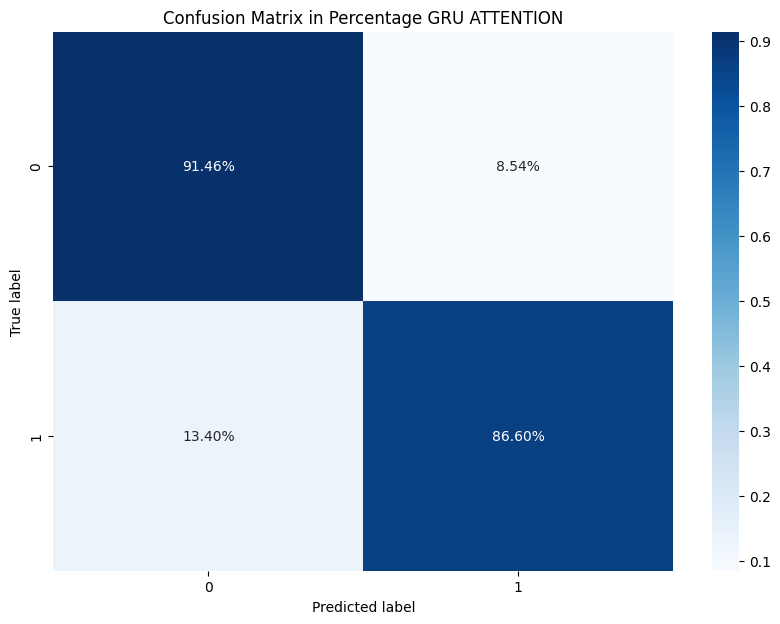

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage GRU ATTENTION')
plt.show()

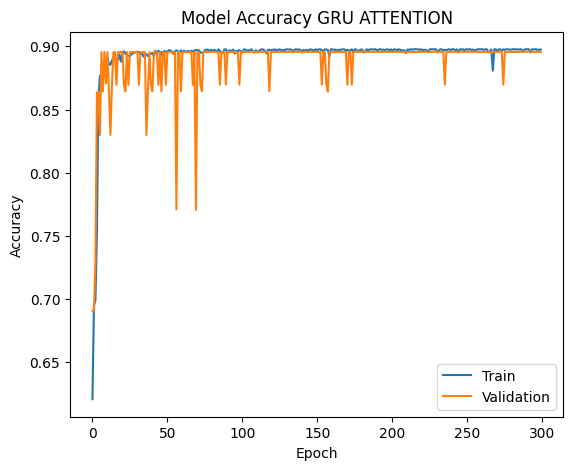

In [17]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_GRU_attention.history['accuracy'])
plt.plot(history_GRU_attention.history['val_accuracy'])
plt.title('Model Accuracy GRU ATTENTION')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

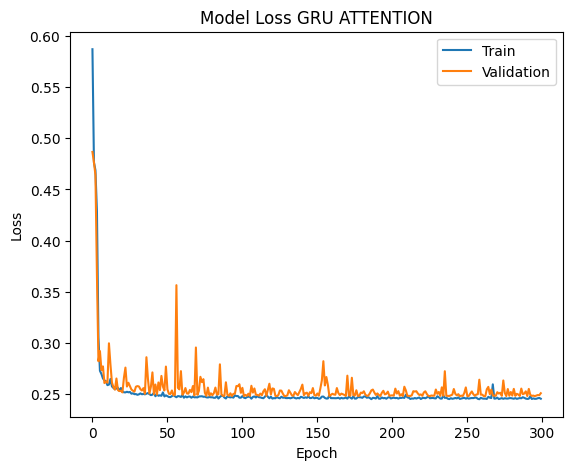

In [18]:

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_GRU_attention.history['loss'])
plt.plot(history_GRU_attention.history['val_loss'])
plt.title('Model Loss GRU ATTENTION')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

# GRU

In [19]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
model = Sequential()
model.add(LSTM(units=32, input_shape=(None, 1)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
%time history_GRU = model.fit(X_train, y_train, epochs=300, batch_size=256, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions using the model
predictions = model.predict(X_test)

predictions = (predictions > 0.5).astype(int)



Epoch 1/300
327/327 [==============================] - 8s 12ms/step - loss: 0.5315 - accuracy: 0.6689 - val_loss: 0.4776 - val_accuracy: 0.6907
Epoch 2/300
327/327 [==============================] - 2s 7ms/step - loss: 0.4600 - accuracy: 0.7201 - val_loss: 0.4410 - val_accuracy: 0.7388
Epoch 3/300
327/327 [==============================] - 2s 7ms/step - loss: 0.4035 - accuracy: 0.7846 - val_loss: 0.3724 - val_accuracy: 0.8634
Epoch 4/300
327/327 [==============================] - 3s 8ms/step - loss: 0.3485 - accuracy: 0.8547 - val_loss: 0.3320 - val_accuracy: 0.8633
Epoch 5/300
327/327 [==============================] - 2s 8ms/step - loss: 0.3212 - accuracy: 0.8608 - val_loss: 0.3155 - val_accuracy: 0.8633
Epoch 6/300
327/327 [==============================] - 3s 8ms/step - loss: 0.3109 - accuracy: 0.8608 - val_loss: 0.3100 - val_accuracy: 0.8633
Epoch 7/300
327/327 [==============================] - 3s 8ms/step - loss: 0.3063 - accuracy: 0.8614 - val_loss: 0.3069 - val_accuracy: 0.863

Epoch 58/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2481 - accuracy: 0.8962 - val_loss: 0.2500 - val_accuracy: 0.8956
Epoch 59/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2483 - accuracy: 0.8950 - val_loss: 0.2529 - val_accuracy: 0.8981
Epoch 60/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2479 - accuracy: 0.8968 - val_loss: 0.2513 - val_accuracy: 0.8956
Epoch 61/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2476 - accuracy: 0.8968 - val_loss: 0.2499 - val_accuracy: 0.8956
Epoch 62/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2484 - accuracy: 0.8961 - val_loss: 0.2524 - val_accuracy: 0.8956
Epoch 63/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2482 - accuracy: 0.8962 - val_loss: 0.2565 - val_accuracy: 0.8698
Epoch 64/300
327/327 [==============================] - 2s 6ms/step - loss: 0.2487 - accuracy: 0.8959 - val_loss: 0.2513 - val_accuracy:

Epoch 115/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2477 - accuracy: 0.8977 - val_loss: 0.2496 - val_accuracy: 0.8957
Epoch 116/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2476 - accuracy: 0.8967 - val_loss: 0.2519 - val_accuracy: 0.8957
Epoch 117/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2476 - accuracy: 0.8973 - val_loss: 0.2497 - val_accuracy: 0.8957
Epoch 118/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2483 - accuracy: 0.8963 - val_loss: 0.2499 - val_accuracy: 0.8957
Epoch 119/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2478 - accuracy: 0.8962 - val_loss: 0.2508 - val_accuracy: 0.8957
Epoch 120/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2477 - accuracy: 0.8965 - val_loss: 0.2523 - val_accuracy: 0.8957
Epoch 121/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2480 - accuracy: 0.8970 - val_loss: 0.2529 - val_ac

327/327 [==============================] - 2s 7ms/step - loss: 0.2473 - accuracy: 0.8968 - val_loss: 0.2504 - val_accuracy: 0.8957
Epoch 172/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2469 - accuracy: 0.8969 - val_loss: 0.2498 - val_accuracy: 0.8957
Epoch 173/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2471 - accuracy: 0.8970 - val_loss: 0.2505 - val_accuracy: 0.8956
Epoch 174/300
327/327 [==============================] - 2s 6ms/step - loss: 0.2471 - accuracy: 0.8967 - val_loss: 0.2501 - val_accuracy: 0.8956
Epoch 175/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2473 - accuracy: 0.8968 - val_loss: 0.2508 - val_accuracy: 0.8957
Epoch 176/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2469 - accuracy: 0.8976 - val_loss: 0.2499 - val_accuracy: 0.8956
Epoch 177/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2476 - accuracy: 0.8964 - val_loss: 0.2512 - val_accuracy: 0.8956

327/327 [==============================] - 2s 7ms/step - loss: 0.2468 - accuracy: 0.8976 - val_loss: 0.2500 - val_accuracy: 0.8956
Epoch 228/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2473 - accuracy: 0.8970 - val_loss: 0.2506 - val_accuracy: 0.8956
Epoch 229/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2471 - accuracy: 0.8969 - val_loss: 0.2525 - val_accuracy: 0.8962
Epoch 230/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2465 - accuracy: 0.8970 - val_loss: 0.2498 - val_accuracy: 0.8956
Epoch 231/300
327/327 [==============================] - 2s 6ms/step - loss: 0.2467 - accuracy: 0.8978 - val_loss: 0.2497 - val_accuracy: 0.8956
Epoch 232/300
327/327 [==============================] - 2s 6ms/step - loss: 0.2470 - accuracy: 0.8969 - val_loss: 0.2523 - val_accuracy: 0.8957
Epoch 233/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2474 - accuracy: 0.8962 - val_loss: 0.2492 - val_accuracy: 0.8956

327/327 [==============================] - 2s 7ms/step - loss: 0.2469 - accuracy: 0.8971 - val_loss: 0.2490 - val_accuracy: 0.8957
Epoch 284/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2466 - accuracy: 0.8971 - val_loss: 0.2498 - val_accuracy: 0.8956
Epoch 285/300
327/327 [==============================] - 2s 8ms/step - loss: 0.2468 - accuracy: 0.8968 - val_loss: 0.2500 - val_accuracy: 0.8956
Epoch 286/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2464 - accuracy: 0.8966 - val_loss: 0.2494 - val_accuracy: 0.8956
Epoch 287/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2466 - accuracy: 0.8965 - val_loss: 0.2512 - val_accuracy: 0.8956
Epoch 288/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2462 - accuracy: 0.8975 - val_loss: 0.2514 - val_accuracy: 0.8956
Epoch 289/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2466 - accuracy: 0.8975 - val_loss: 0.2494 - val_accuracy: 0.8956

In [20]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 89.56346734390723
f1score 86.63147557083231


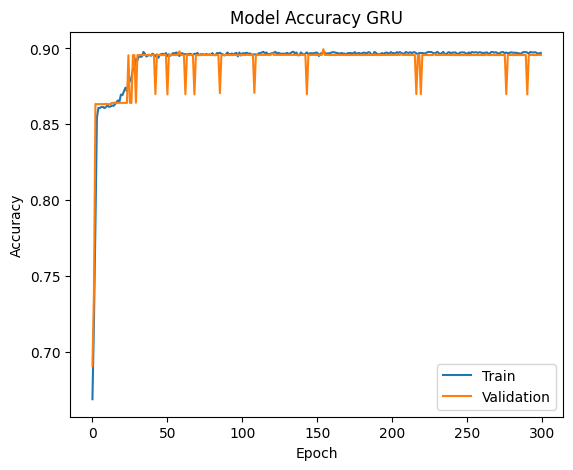

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.title('Model Accuracy GRU')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

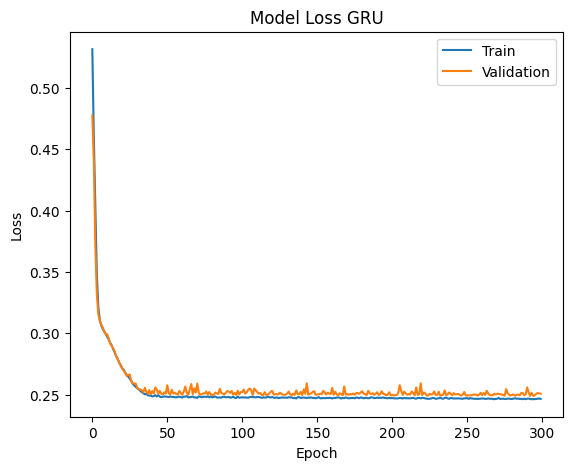

In [22]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU.history['val_loss'])
plt.title('Model Loss GRU')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

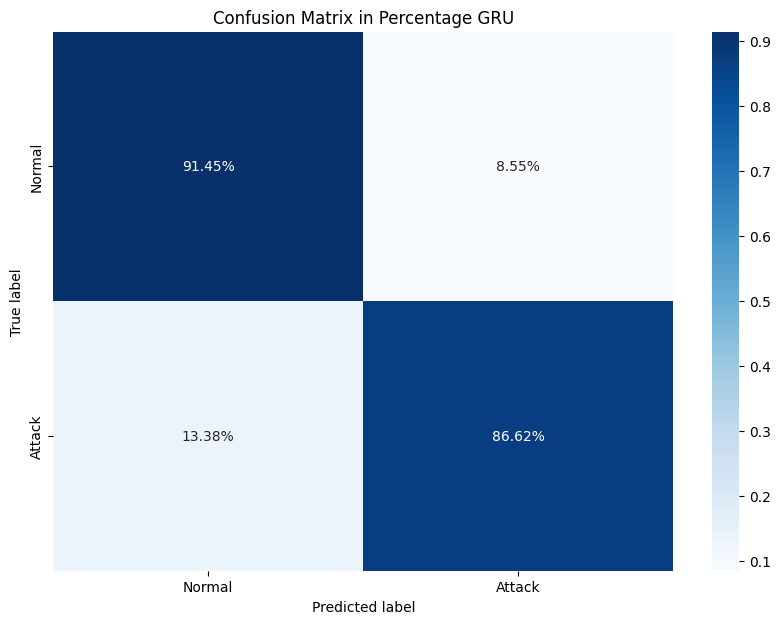

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage GRU')
plt.show()

# RNN

In [24]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense,Dropout
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(None, 1)))

model.add(Dense(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

%time history_RNN = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=1024, verbose=1)

predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)


Epoch 1/300
82/82 [==============================] - 4s 17ms/step - loss: 0.5182 - accuracy: 0.6868 - val_loss: 0.4855 - val_accuracy: 0.6907
Epoch 2/300
82/82 [==============================] - 1s 9ms/step - loss: 0.4801 - accuracy: 0.6947 - val_loss: 0.4824 - val_accuracy: 0.6907
Epoch 3/300
82/82 [==============================] - 1s 9ms/step - loss: 0.4783 - accuracy: 0.6959 - val_loss: 0.4794 - val_accuracy: 0.6907
Epoch 4/300
82/82 [==============================] - 1s 9ms/step - loss: 0.4759 - accuracy: 0.6977 - val_loss: 0.4769 - val_accuracy: 0.6909
Epoch 5/300
82/82 [==============================] - 1s 10ms/step - loss: 0.4727 - accuracy: 0.7043 - val_loss: 0.4731 - val_accuracy: 0.7385
Epoch 6/300
82/82 [==============================] - 1s 10ms/step - loss: 0.4678 - accuracy: 0.7105 - val_loss: 0.4674 - val_accuracy: 0.6976
Epoch 7/300
82/82 [==============================] - 1s 10ms/step - loss: 0.4611 - accuracy: 0.7243 - val_loss: 0.4600 - val_accuracy: 0.7141
Epoch 8/3

82/82 [==============================] - 1s 9ms/step - loss: 0.3100 - accuracy: 0.8944 - val_loss: 0.3201 - val_accuracy: 0.8695
Epoch 59/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3143 - accuracy: 0.8913 - val_loss: 0.3310 - val_accuracy: 0.8641
Epoch 60/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3114 - accuracy: 0.8904 - val_loss: 0.3127 - val_accuracy: 0.8955
Epoch 61/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3116 - accuracy: 0.8923 - val_loss: 0.3114 - val_accuracy: 0.8955
Epoch 62/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3109 - accuracy: 0.8937 - val_loss: 0.3134 - val_accuracy: 0.8955
Epoch 63/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3096 - accuracy: 0.8938 - val_loss: 0.3117 - val_accuracy: 0.8955
Epoch 64/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3099 - accuracy: 0.8954 - val_loss: 0.3189 - val_accuracy: 0.8955
Epoch 65/300
82/8

82/82 [==============================] - 1s 10ms/step - loss: 0.3081 - accuracy: 0.8958 - val_loss: 0.3106 - val_accuracy: 0.8955
Epoch 116/300
82/82 [==============================] - 1s 11ms/step - loss: 0.3081 - accuracy: 0.8944 - val_loss: 0.3120 - val_accuracy: 0.8955
Epoch 117/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3092 - accuracy: 0.8946 - val_loss: 0.3102 - val_accuracy: 0.8955
Epoch 118/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3092 - accuracy: 0.8950 - val_loss: 0.3092 - val_accuracy: 0.8955
Epoch 119/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3078 - accuracy: 0.8948 - val_loss: 0.3123 - val_accuracy: 0.8955
Epoch 120/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3087 - accuracy: 0.8946 - val_loss: 0.3144 - val_accuracy: 0.8955
Epoch 121/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3092 - accuracy: 0.8936 - val_loss: 0.3241 - val_accuracy: 0.8955
Epoch 1

82/82 [==============================] - 1s 9ms/step - loss: 0.3116 - accuracy: 0.8908 - val_loss: 0.3266 - val_accuracy: 0.8759
Epoch 173/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3116 - accuracy: 0.8908 - val_loss: 0.3123 - val_accuracy: 0.8955
Epoch 174/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3094 - accuracy: 0.8922 - val_loss: 0.3120 - val_accuracy: 0.8955
Epoch 175/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3040 - accuracy: 0.8965 - val_loss: 0.3170 - val_accuracy: 0.8955
Epoch 176/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3061 - accuracy: 0.8945 - val_loss: 0.3085 - val_accuracy: 0.8955
Epoch 177/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3078 - accuracy: 0.8922 - val_loss: 0.3149 - val_accuracy: 0.8955
Epoch 178/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3059 - accuracy: 0.8946 - val_loss: 0.3125 - val_accuracy: 0.8956
Epoch 179/30

82/82 [==============================] - 1s 9ms/step - loss: 0.3029 - accuracy: 0.8958 - val_loss: 0.3068 - val_accuracy: 0.8955
Epoch 230/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3046 - accuracy: 0.8945 - val_loss: 0.3069 - val_accuracy: 0.8955
Epoch 231/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3023 - accuracy: 0.8953 - val_loss: 0.3082 - val_accuracy: 0.8955
Epoch 232/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3045 - accuracy: 0.8943 - val_loss: 0.3072 - val_accuracy: 0.8955
Epoch 233/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3038 - accuracy: 0.8949 - val_loss: 0.3117 - val_accuracy: 0.8956
Epoch 234/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3037 - accuracy: 0.8954 - val_loss: 0.3062 - val_accuracy: 0.8955
Epoch 235/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3024 - accuracy: 0.8958 - val_loss: 0.3067 - val_accuracy: 0.8955
Epoch 236/

82/82 [==============================] - 1s 10ms/step - loss: 0.2991 - accuracy: 0.8953 - val_loss: 0.3026 - val_accuracy: 0.8956
Epoch 287/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3022 - accuracy: 0.8924 - val_loss: 0.3092 - val_accuracy: 0.8956
Epoch 288/300
82/82 [==============================] - 1s 9ms/step - loss: 0.2995 - accuracy: 0.8962 - val_loss: 0.3033 - val_accuracy: 0.8956
Epoch 289/300
82/82 [==============================] - 1s 9ms/step - loss: 0.3002 - accuracy: 0.8946 - val_loss: 0.3091 - val_accuracy: 0.8956
Epoch 290/300
82/82 [==============================] - 1s 9ms/step - loss: 0.2993 - accuracy: 0.8956 - val_loss: 0.3061 - val_accuracy: 0.8956
Epoch 291/300
82/82 [==============================] - 1s 10ms/step - loss: 0.3013 - accuracy: 0.8943 - val_loss: 0.3071 - val_accuracy: 0.8956
Epoch 292/300
82/82 [==============================] - 1s 9ms/step - loss: 0.2989 - accuracy: 0.8954 - val_loss: 0.3019 - val_accuracy: 0.8956
Epoch 293/

In [25]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions)
print("f1score"+" "+str(f1*100))

accuracy 89.56346734390723
f1score 86.62819253438114


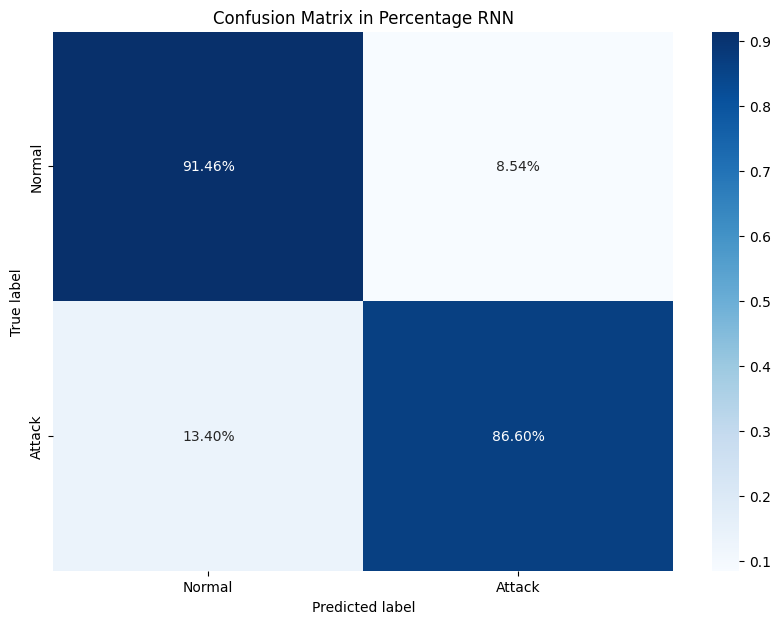

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage RNN')
plt.show()



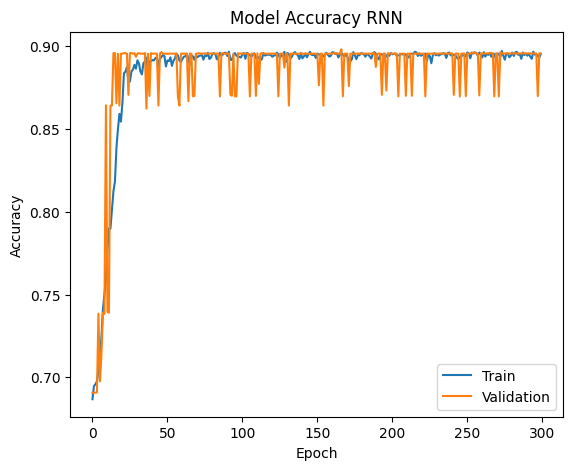

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('Model Accuracy RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

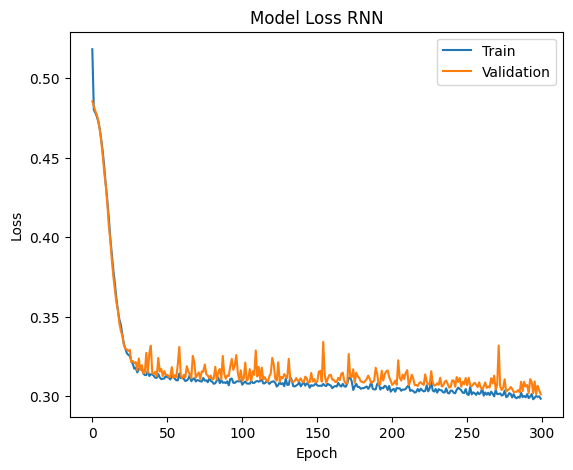

In [28]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('Model Loss RNN')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()


# RNN Attention

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dense, Concatenate, Dot, Activation
import numpy as np

class AttentionRNN(Model):
    def __init__(self, units):
        super(AttentionRNN, self).__init__()
        self.units = units
        self.rnn = SimpleRNN(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # RNN output and hidden state calculation
        outputs, state = self.rnn(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector

# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)
rnn_layer = AttentionRNN(units)
outputs = rnn_layer(inputs)
# Define output layer
outputs = Dense(1, activation='sigmoid')(outputs)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

%time history_RNN_att = model.fit(X_train, y_train, epochs=300, batch_size=512, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

predictions = (predictions > 0.5).astype(int)




Epoch 1/300
164/164 [==============================] - 5s 14ms/step - loss: 0.5265 - accuracy: 0.6602 - val_loss: 0.4777 - val_accuracy: 0.6911
Epoch 2/300
164/164 [==============================] - 2s 9ms/step - loss: 0.4627 - accuracy: 0.7260 - val_loss: 0.4531 - val_accuracy: 0.7392
Epoch 3/300
164/164 [==============================] - 1s 9ms/step - loss: 0.4317 - accuracy: 0.7615 - val_loss: 0.4105 - val_accuracy: 0.7387
Epoch 4/300
164/164 [==============================] - 2s 9ms/step - loss: 0.3898 - accuracy: 0.7950 - val_loss: 0.3980 - val_accuracy: 0.8289
Epoch 5/300
164/164 [==============================] - 2s 10ms/step - loss: 0.3507 - accuracy: 0.8425 - val_loss: 0.3372 - val_accuracy: 0.8639
Epoch 6/300
164/164 [==============================] - 2s 10ms/step - loss: 0.3232 - accuracy: 0.8576 - val_loss: 0.3196 - val_accuracy: 0.8633
Epoch 7/300
164/164 [==============================] - 1s 8ms/step - loss: 0.3105 - accuracy: 0.8576 - val_loss: 0.3080 - val_accuracy: 0.8

Epoch 58/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2508 - accuracy: 0.8960 - val_loss: 0.2502 - val_accuracy: 0.8955
Epoch 59/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2492 - accuracy: 0.8967 - val_loss: 0.2772 - val_accuracy: 0.8695
Epoch 60/300
164/164 [==============================] - 2s 9ms/step - loss: 0.2522 - accuracy: 0.8927 - val_loss: 0.2571 - val_accuracy: 0.8695
Epoch 61/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2499 - accuracy: 0.8963 - val_loss: 0.2507 - val_accuracy: 0.8955
Epoch 62/300
164/164 [==============================] - 2s 9ms/step - loss: 0.2516 - accuracy: 0.8952 - val_loss: 0.2554 - val_accuracy: 0.8955
Epoch 63/300
164/164 [==============================] - 2s 9ms/step - loss: 0.2502 - accuracy: 0.8961 - val_loss: 0.2591 - val_accuracy: 0.8955
Epoch 64/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2506 - accuracy: 0.8942 - val_loss: 0.2509 - val_accuracy

Epoch 115/300
164/164 [==============================] - 1s 7ms/step - loss: 0.2466 - accuracy: 0.8974 - val_loss: 0.3372 - val_accuracy: 0.7710
Epoch 116/300
164/164 [==============================] - 1s 7ms/step - loss: 0.2474 - accuracy: 0.8967 - val_loss: 0.2797 - val_accuracy: 0.8644
Epoch 117/300
164/164 [==============================] - 1s 7ms/step - loss: 0.2470 - accuracy: 0.8960 - val_loss: 0.2480 - val_accuracy: 0.8955
Epoch 118/300
164/164 [==============================] - 1s 8ms/step - loss: 0.2482 - accuracy: 0.8964 - val_loss: 0.2485 - val_accuracy: 0.8955
Epoch 119/300
164/164 [==============================] - 1s 7ms/step - loss: 0.2478 - accuracy: 0.8959 - val_loss: 0.2545 - val_accuracy: 0.8955
Epoch 120/300
164/164 [==============================] - 1s 7ms/step - loss: 0.2467 - accuracy: 0.8973 - val_loss: 0.2483 - val_accuracy: 0.8955
Epoch 121/300
164/164 [==============================] - 1s 8ms/step - loss: 0.2468 - accuracy: 0.8964 - val_loss: 0.2512 - val_ac

164/164 [==============================] - 1s 9ms/step - loss: 0.2459 - accuracy: 0.8977 - val_loss: 0.2547 - val_accuracy: 0.8957
Epoch 172/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2470 - accuracy: 0.8968 - val_loss: 0.2507 - val_accuracy: 0.8956
Epoch 173/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2453 - accuracy: 0.8977 - val_loss: 0.2492 - val_accuracy: 0.8956
Epoch 174/300
164/164 [==============================] - 2s 9ms/step - loss: 0.2453 - accuracy: 0.8977 - val_loss: 0.2537 - val_accuracy: 0.8956
Epoch 175/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2463 - accuracy: 0.8977 - val_loss: 0.2617 - val_accuracy: 0.8696
Epoch 176/300
164/164 [==============================] - 2s 10ms/step - loss: 0.2469 - accuracy: 0.8959 - val_loss: 0.2484 - val_accuracy: 0.8956
Epoch 177/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2467 - accuracy: 0.8965 - val_loss: 0.2479 - val_accuracy: 0.895

164/164 [==============================] - 2s 9ms/step - loss: 0.2456 - accuracy: 0.8977 - val_loss: 0.2480 - val_accuracy: 0.8957
Epoch 228/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2456 - accuracy: 0.8977 - val_loss: 0.2484 - val_accuracy: 0.8956
Epoch 229/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2462 - accuracy: 0.8973 - val_loss: 0.2481 - val_accuracy: 0.8956
Epoch 230/300
164/164 [==============================] - 2s 10ms/step - loss: 0.2450 - accuracy: 0.8977 - val_loss: 0.2576 - val_accuracy: 0.8959
Epoch 231/300
164/164 [==============================] - 2s 10ms/step - loss: 0.2468 - accuracy: 0.8970 - val_loss: 0.2519 - val_accuracy: 0.8959
Epoch 232/300
164/164 [==============================] - 2s 10ms/step - loss: 0.2469 - accuracy: 0.8960 - val_loss: 0.2478 - val_accuracy: 0.8956
Epoch 233/300
164/164 [==============================] - 2s 9ms/step - loss: 0.2457 - accuracy: 0.8974 - val_loss: 0.2490 - val_accuracy: 0

164/164 [==============================] - 1s 9ms/step - loss: 0.2454 - accuracy: 0.8977 - val_loss: 0.2576 - val_accuracy: 0.8956
Epoch 284/300
164/164 [==============================] - 1s 8ms/step - loss: 0.2452 - accuracy: 0.8977 - val_loss: 0.2593 - val_accuracy: 0.8955
Epoch 285/300
164/164 [==============================] - 2s 9ms/step - loss: 0.2450 - accuracy: 0.8969 - val_loss: 0.2507 - val_accuracy: 0.8959
Epoch 286/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2452 - accuracy: 0.8977 - val_loss: 0.2510 - val_accuracy: 0.8956
Epoch 287/300
164/164 [==============================] - 1s 8ms/step - loss: 0.2473 - accuracy: 0.8974 - val_loss: 0.2482 - val_accuracy: 0.8956
Epoch 288/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2456 - accuracy: 0.8959 - val_loss: 0.2481 - val_accuracy: 0.8956
Epoch 289/300
164/164 [==============================] - 1s 9ms/step - loss: 0.2450 - accuracy: 0.8977 - val_loss: 0.2497 - val_accuracy: 0.8959

In [30]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 89.58742632612967
f1score 86.66298410360277


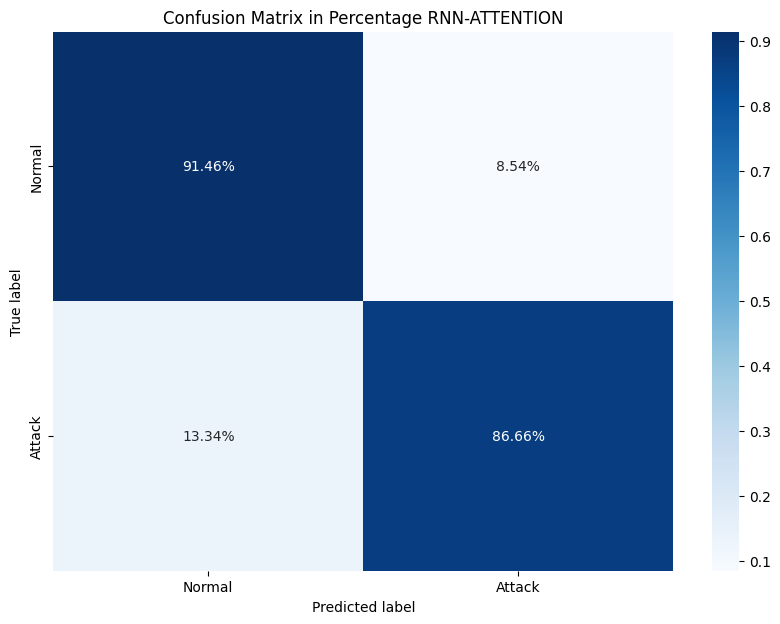

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage RNN-ATTENTION')
plt.show()

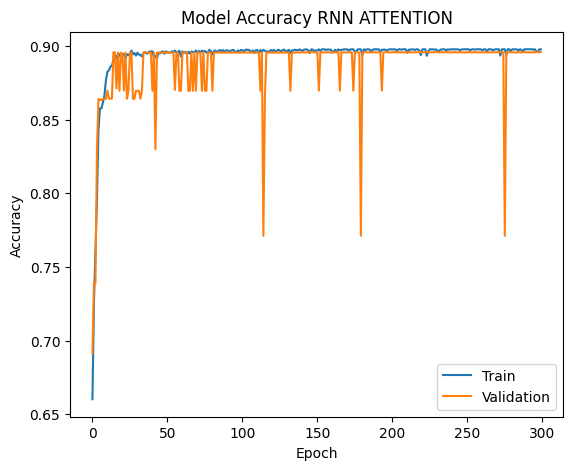

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_RNN_att.history['accuracy'])
plt.plot(history_RNN_att.history['val_accuracy'])
plt.title('Model Accuracy RNN ATTENTION')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

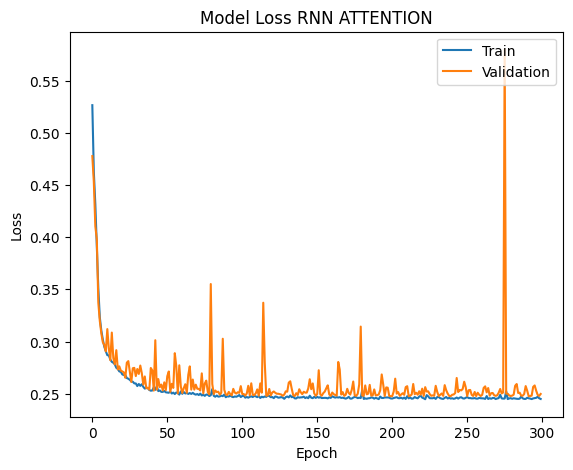

In [33]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_RNN_att.history['loss'])
plt.plot(history_RNN_att.history['val_loss'])
plt.title('Model Loss RNN ATTENTION')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

# LSTM

In [34]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
# Build the LSTM model

model = Sequential()
model.add(LSTM(units=32, input_shape=(None, 1)))

model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
%time history_LSTM = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=256, verbose=1)
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)


Epoch 1/300
327/327 [==============================] - 8s 10ms/step - loss: 0.5504 - accuracy: 0.6519 - val_loss: 0.4824 - val_accuracy: 0.6906
Epoch 2/300
327/327 [==============================] - 2s 7ms/step - loss: 0.4663 - accuracy: 0.7125 - val_loss: 0.4514 - val_accuracy: 0.7388
Epoch 3/300
327/327 [==============================] - 2s 8ms/step - loss: 0.4131 - accuracy: 0.7782 - val_loss: 0.3772 - val_accuracy: 0.7382
Epoch 4/300
327/327 [==============================] - 3s 8ms/step - loss: 0.3487 - accuracy: 0.8556 - val_loss: 0.3311 - val_accuracy: 0.8633
Epoch 5/300
327/327 [==============================] - 3s 8ms/step - loss: 0.3202 - accuracy: 0.8614 - val_loss: 0.3178 - val_accuracy: 0.8635
Epoch 6/300
327/327 [==============================] - 2s 7ms/step - loss: 0.3097 - accuracy: 0.8605 - val_loss: 0.3084 - val_accuracy: 0.8634
Epoch 7/300
327/327 [==============================] - 2s 8ms/step - loss: 0.3051 - accuracy: 0.8614 - val_loss: 0.3054 - val_accuracy: 0.863

Epoch 58/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2481 - accuracy: 0.8961 - val_loss: 0.2499 - val_accuracy: 0.8956
Epoch 59/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2483 - accuracy: 0.8956 - val_loss: 0.2506 - val_accuracy: 0.8956
Epoch 60/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2480 - accuracy: 0.8962 - val_loss: 0.2515 - val_accuracy: 0.8956
Epoch 61/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2478 - accuracy: 0.8968 - val_loss: 0.2502 - val_accuracy: 0.8956
Epoch 62/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2479 - accuracy: 0.8958 - val_loss: 0.2506 - val_accuracy: 0.8956
Epoch 63/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2476 - accuracy: 0.8967 - val_loss: 0.2516 - val_accuracy: 0.8956
Epoch 64/300
327/327 [==============================] - 2s 6ms/step - loss: 0.2479 - accuracy: 0.8969 - val_loss: 0.2501 - val_accuracy:

Epoch 115/300
327/327 [==============================] - 2s 6ms/step - loss: 0.2471 - accuracy: 0.8977 - val_loss: 0.2495 - val_accuracy: 0.8957
Epoch 116/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2470 - accuracy: 0.8975 - val_loss: 0.2513 - val_accuracy: 0.8957
Epoch 117/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2474 - accuracy: 0.8972 - val_loss: 0.2514 - val_accuracy: 0.8957
Epoch 118/300
327/327 [==============================] - 2s 8ms/step - loss: 0.2475 - accuracy: 0.8966 - val_loss: 0.2495 - val_accuracy: 0.8957
Epoch 119/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2474 - accuracy: 0.8966 - val_loss: 0.2570 - val_accuracy: 0.8956
Epoch 120/300
327/327 [==============================] - 2s 8ms/step - loss: 0.2478 - accuracy: 0.8971 - val_loss: 0.2500 - val_accuracy: 0.8957
Epoch 121/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2473 - accuracy: 0.8970 - val_loss: 0.2505 - val_ac

327/327 [==============================] - 2s 7ms/step - loss: 0.2470 - accuracy: 0.8968 - val_loss: 0.2510 - val_accuracy: 0.8956
Epoch 172/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2467 - accuracy: 0.8975 - val_loss: 0.2503 - val_accuracy: 0.8957
Epoch 173/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2476 - accuracy: 0.8963 - val_loss: 0.2496 - val_accuracy: 0.8956
Epoch 174/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2469 - accuracy: 0.8968 - val_loss: 0.2503 - val_accuracy: 0.8956
Epoch 175/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2468 - accuracy: 0.8964 - val_loss: 0.2496 - val_accuracy: 0.8956
Epoch 176/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2467 - accuracy: 0.8965 - val_loss: 0.2499 - val_accuracy: 0.8956
Epoch 177/300
327/327 [==============================] - 2s 7ms/step - loss: 0.2475 - accuracy: 0.8956 - val_loss: 0.2516 - val_accuracy: 0.8957

327/327 [==============================] - 3s 8ms/step - loss: 0.2465 - accuracy: 0.8968 - val_loss: 0.2515 - val_accuracy: 0.8956
Epoch 228/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2463 - accuracy: 0.8976 - val_loss: 0.2511 - val_accuracy: 0.8956
Epoch 229/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2463 - accuracy: 0.8973 - val_loss: 0.2535 - val_accuracy: 0.8956
Epoch 230/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2470 - accuracy: 0.8975 - val_loss: 0.2495 - val_accuracy: 0.8957
Epoch 231/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2464 - accuracy: 0.8971 - val_loss: 0.2495 - val_accuracy: 0.8957
Epoch 232/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2463 - accuracy: 0.8976 - val_loss: 0.2495 - val_accuracy: 0.8957
Epoch 233/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2467 - accuracy: 0.8973 - val_loss: 0.2490 - val_accuracy: 0.8956

327/327 [==============================] - 3s 8ms/step - loss: 0.2461 - accuracy: 0.8968 - val_loss: 0.2501 - val_accuracy: 0.8956
Epoch 284/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2461 - accuracy: 0.8976 - val_loss: 0.2489 - val_accuracy: 0.8956
Epoch 285/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2459 - accuracy: 0.8971 - val_loss: 0.2487 - val_accuracy: 0.8957
Epoch 286/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2460 - accuracy: 0.8972 - val_loss: 0.2500 - val_accuracy: 0.8956
Epoch 287/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2462 - accuracy: 0.8972 - val_loss: 0.2501 - val_accuracy: 0.8956
Epoch 288/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2462 - accuracy: 0.8965 - val_loss: 0.2488 - val_accuracy: 0.8956
Epoch 289/300
327/327 [==============================] - 3s 8ms/step - loss: 0.2459 - accuracy: 0.8976 - val_loss: 0.2489 - val_accuracy: 0.8956

In [35]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 89.57305093679621
f1score 86.63883089770354


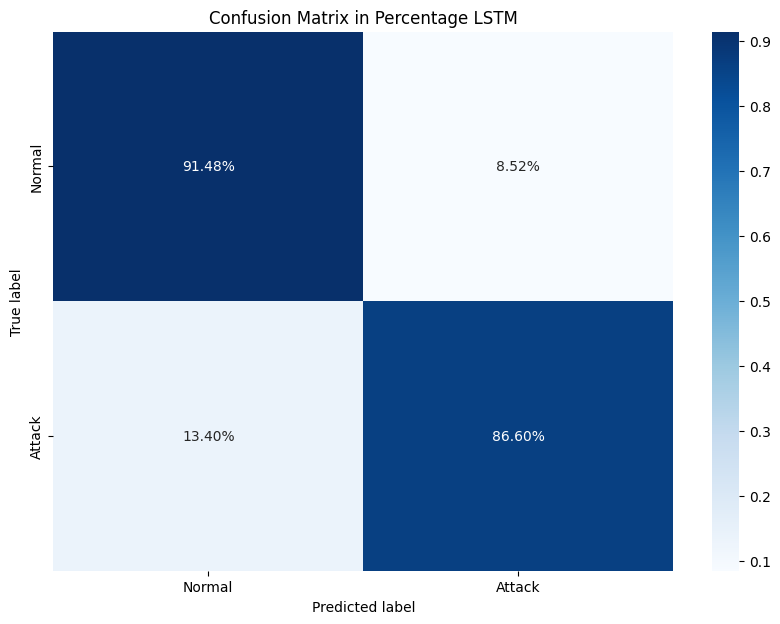

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage LSTM')
plt.show()


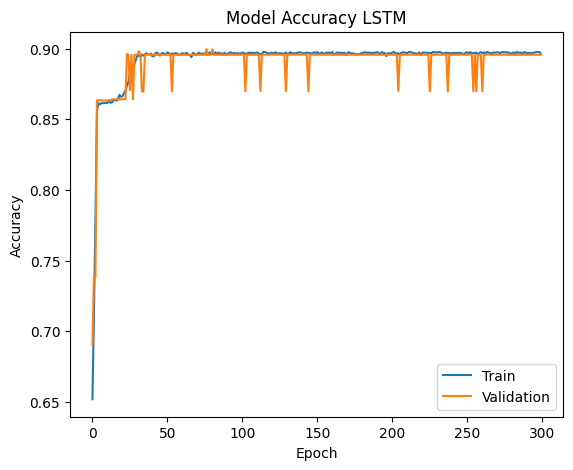

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('Model Accuracy LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

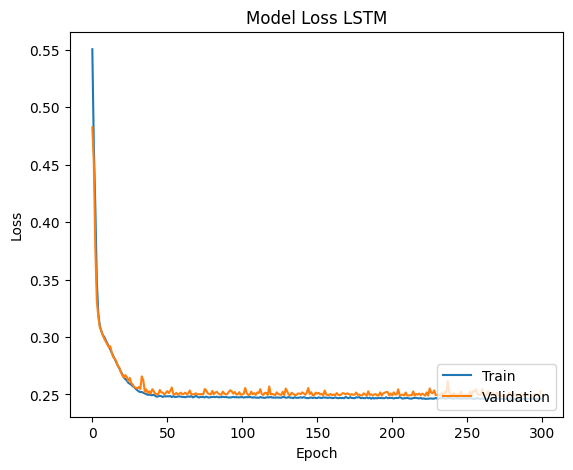

In [38]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('Model Loss LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.show()

# LSTM Attention

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dense, Concatenate, Dot, Activation
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

class AttentionLSTM(tf.keras.layers.Layer):
    def __init__(self, units):
        super(AttentionLSTM, self).__init__()
        self.units = units
        self.rnn = LSTM(units, return_sequences=True, return_state=True)
        self.Wc = Dense(units)
        self.Va = Dense(1)

    def call(self, inputs, training=None):
        # inputs shape: (batch_size, sequence_length, input_dim)
        
        # RNN output and hidden state calculation
        outputs, state_h, state_c = self.rnn(inputs)
        
        # Expand dimensions of hidden state to perform addition
        hidden_with_time_axis = tf.expand_dims(state_h, 1)
        
        # Attention score calculation
        score = self.Va(tf.nn.tanh(self.Wc(outputs) + hidden_with_time_axis))
        
        # Attention weights calculation
        attention_weights = tf.nn.softmax(score, axis=1)
        
        # Weighted sum of outputs based on attention weights
        context_vector = attention_weights * outputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        
        return context_vector

# Define the model architecture
input_shape = (None, 1)
units = 32
inputs = Input(shape=input_shape)
attention_lstm_layer = AttentionLSTM(units)
context_vector = attention_lstm_layer(inputs)

# Define output layer
outputs = Dense(1, activation='sigmoid')(context_vector)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and y_train are predefined
# X_train shape should be (num_samples, sequence_length, input_dim)
# y_train shape should be (num_samples,)
%time history_LSTM_att = model.fit(X_train, y_train, epochs=300, batch_size=512, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)

predictions = model.predict(X_test)

predictions = (predictions > 0.5).astype(int)

Epoch 1/300
164/164 [==============================] - 7s 19ms/step - loss: 0.6104 - accuracy: 0.6072 - val_loss: 0.5082 - val_accuracy: 0.5612
Epoch 2/300
164/164 [==============================] - 2s 13ms/step - loss: 0.4789 - accuracy: 0.6906 - val_loss: 0.4643 - val_accuracy: 0.7390
Epoch 3/300
164/164 [==============================] - 2s 13ms/step - loss: 0.4221 - accuracy: 0.7633 - val_loss: 0.3600 - val_accuracy: 0.8635
Epoch 4/300
164/164 [==============================] - 2s 13ms/step - loss: 0.3162 - accuracy: 0.8539 - val_loss: 0.2886 - val_accuracy: 0.8635
Epoch 5/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2817 - accuracy: 0.8616 - val_loss: 0.2766 - val_accuracy: 0.8635
Epoch 6/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2757 - accuracy: 0.8616 - val_loss: 0.2747 - val_accuracy: 0.8635
Epoch 7/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2745 - accuracy: 0.8616 - val_loss: 0.2730 - val_accuracy:

164/164 [==============================] - 2s 11ms/step - loss: 0.2677 - accuracy: 0.8616 - val_loss: 0.2678 - val_accuracy: 0.8635
Epoch 58/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2677 - accuracy: 0.8616 - val_loss: 0.2677 - val_accuracy: 0.8635
Epoch 59/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2678 - accuracy: 0.8616 - val_loss: 0.2690 - val_accuracy: 0.8635
Epoch 60/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2677 - accuracy: 0.8616 - val_loss: 0.2679 - val_accuracy: 0.8635
Epoch 61/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2677 - accuracy: 0.8616 - val_loss: 0.2682 - val_accuracy: 0.8635
Epoch 62/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2676 - accuracy: 0.8616 - val_loss: 0.2678 - val_accuracy: 0.8635
Epoch 63/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2673 - accuracy: 0.8616 - val_loss: 0.2678 - val_accuracy: 0.863

164/164 [==============================] - 2s 14ms/step - loss: 0.2459 - accuracy: 0.8977 - val_loss: 0.2497 - val_accuracy: 0.8956
Epoch 114/300
164/164 [==============================] - 2s 15ms/step - loss: 0.2461 - accuracy: 0.8977 - val_loss: 0.2485 - val_accuracy: 0.8956
Epoch 115/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2466 - accuracy: 0.8977 - val_loss: 0.2491 - val_accuracy: 0.8956
Epoch 116/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2466 - accuracy: 0.8973 - val_loss: 0.2571 - val_accuracy: 0.8956
Epoch 117/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2467 - accuracy: 0.8970 - val_loss: 0.2486 - val_accuracy: 0.8956
Epoch 118/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2462 - accuracy: 0.8977 - val_loss: 0.2494 - val_accuracy: 0.8956
Epoch 119/300
164/164 [==============================] - 2s 11ms/step - loss: 0.2456 - accuracy: 0.8977 - val_loss: 0.2488 - val_accuracy:

164/164 [==============================] - 2s 13ms/step - loss: 0.2452 - accuracy: 0.8977 - val_loss: 0.2501 - val_accuracy: 0.8956
Epoch 170/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2450 - accuracy: 0.8977 - val_loss: 0.2488 - val_accuracy: 0.8956
Epoch 171/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2456 - accuracy: 0.8977 - val_loss: 0.2541 - val_accuracy: 0.8956
Epoch 172/300
164/164 [==============================] - 2s 15ms/step - loss: 0.2457 - accuracy: 0.8977 - val_loss: 0.2517 - val_accuracy: 0.8956
Epoch 173/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2454 - accuracy: 0.8977 - val_loss: 0.2492 - val_accuracy: 0.8956
Epoch 174/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2455 - accuracy: 0.8977 - val_loss: 0.2488 - val_accuracy: 0.8956
Epoch 175/300
164/164 [==============================] - 2s 15ms/step - loss: 0.2454 - accuracy: 0.8977 - val_loss: 0.2483 - val_accuracy:

164/164 [==============================] - 2s 13ms/step - loss: 0.2447 - accuracy: 0.8977 - val_loss: 0.2479 - val_accuracy: 0.8956
Epoch 226/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2450 - accuracy: 0.8975 - val_loss: 0.2486 - val_accuracy: 0.8956
Epoch 227/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2448 - accuracy: 0.8977 - val_loss: 0.2481 - val_accuracy: 0.8956
Epoch 228/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2448 - accuracy: 0.8977 - val_loss: 0.2489 - val_accuracy: 0.8956
Epoch 229/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2448 - accuracy: 0.8977 - val_loss: 0.2480 - val_accuracy: 0.8956
Epoch 230/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2449 - accuracy: 0.8977 - val_loss: 0.2480 - val_accuracy: 0.8956
Epoch 231/300
164/164 [==============================] - 2s 12ms/step - loss: 0.2446 - accuracy: 0.8977 - val_loss: 0.2507 - val_accuracy:

164/164 [==============================] - 2s 14ms/step - loss: 0.2448 - accuracy: 0.8974 - val_loss: 0.2486 - val_accuracy: 0.8956
Epoch 282/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2449 - accuracy: 0.8970 - val_loss: 0.2480 - val_accuracy: 0.8956
Epoch 283/300
164/164 [==============================] - 2s 13ms/step - loss: 0.2447 - accuracy: 0.8977 - val_loss: 0.2481 - val_accuracy: 0.8956
Epoch 284/300
164/164 [==============================] - 2s 14ms/step - loss: 0.2446 - accuracy: 0.8977 - val_loss: 0.2483 - val_accuracy: 0.8956
Epoch 285/300
164/164 [==============================] - 2s 15ms/step - loss: 0.2448 - accuracy: 0.8977 - val_loss: 0.2483 - val_accuracy: 0.8956
Epoch 286/300
164/164 [==============================] - 2s 15ms/step - loss: 0.2444 - accuracy: 0.8977 - val_loss: 0.2667 - val_accuracy: 0.8697
Epoch 287/300
164/164 [==============================] - 3s 15ms/step - loss: 0.2450 - accuracy: 0.8968 - val_loss: 0.2480 - val_accuracy:

In [40]:
from sklearn.metrics import  accuracy_score
print("accuracy"+" "+str(accuracy_score(y_test, predictions)*100))
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predictions )
print("f1score"+" "+str(f1*100))

accuracy 89.56346734390723
f1score 86.62819253438114


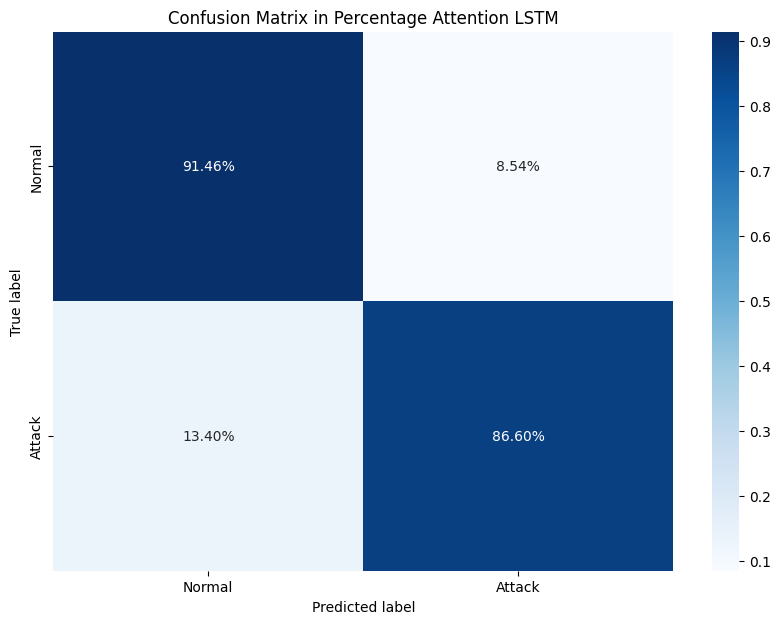

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

# Normalize the confusion matrix by the number of samples in each true class
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix in Percentage Attention LSTM')
plt.show()


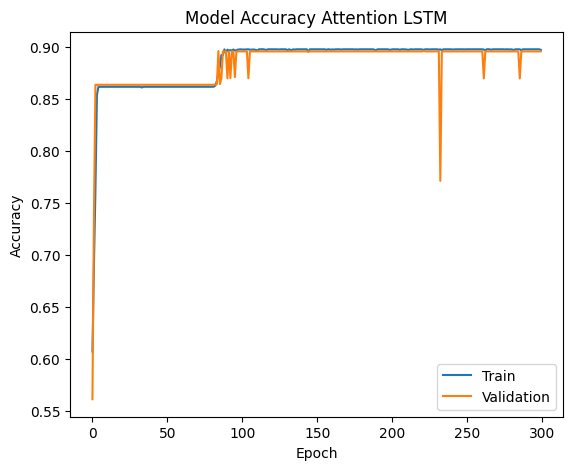

In [42]:

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_LSTM_att.history['accuracy'])
plt.plot(history_LSTM_att.history['val_accuracy'])
plt.title('Model Accuracy Attention LSTM')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

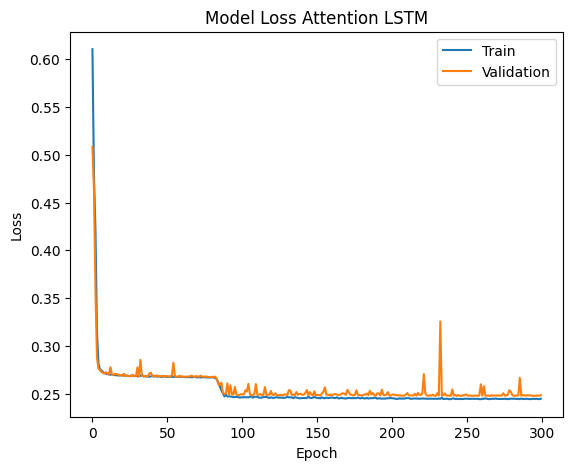

In [43]:
# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_LSTM_att.history['loss'])
plt.plot(history_LSTM_att.history['val_loss'])
plt.title('Model Loss Attention LSTM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()
